Capstone Project - Victor Fallas UCI_Credit_Card

Data Set Info:

Data set collected from site: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/home

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

Potential problem: we want to group values 5 and 6 for education into one unica value (accordin to kaggle description) as they both mean "unknown" , maybe to include valu 4 into that grouping

Data type check

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
import sklearn

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename) #, index_col=0)
data = data.drop(columns='ID') # don't need ID column, because just the index + 1

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).T

,8989,26611,27754,20385,8353
LIMIT_BAL,210000.0,50000.0,50000.0,30000.0,280000.0
SEX,2.0,1.0,2.0,1.0,2.0
EDUCATION,2.0,2.0,1.0,3.0,1.0
MARRIAGE,1.0,2.0,2.0,2.0,1.0
AGE,34.0,23.0,23.0,23.0,34.0
PAY_0,0.0,1.0,1.0,1.0,0.0
PAY_2,0.0,2.0,2.0,2.0,0.0
PAY_3,0.0,0.0,0.0,0.0,0.0
PAY_4,0.0,0.0,0.0,0.0,0.0
PAY_5,-1.0,-1.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

Todas las columnas de este conjunto de datos tienen un tipo numérico. Son de valor flotante (continuo) o de valor int (discreto). Nada parece haber nada raro, así que podemos continuar.

In [6]:
display(data.shape)

(30000, 24)

Data Cleaning

Get rid of incorrect colunm names

In [ ]:
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

Replace negatie values with 0 in "Pay_x" colunm

In [12]:
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

Get rid of 0 values in "MArriage" column 

In [13]:
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

The "Other" value may mean divorced, widowed, separated, etc

Get rid of 0 values for Education


EDUCATION currently code as: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [14]:
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

Analysis

Models to use:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)
5. Random Forest (RF)
6. Naive Bayes

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, scale, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
from scipy.stats import randint
import time

In [16]:
#### paso 1) Pre-process Data

numeric_features = ['LIMIT_BAL', 'AGE',  
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
                   ]



# data['PAY_1'] = data.PAY_1.astype('float64')
# data['PAY_2'] = data.PAY_2.astype('float64')
# data['PAY_3'] = data.PAY_3.astype('float64')
# data['PAY_4'] = data.PAY_4.astype('float64')
# data['PAY_5'] = data.PAY_5.astype('float64')
# data['PAY_6'] = data.PAY_6.astype('float64')
data['AGE'] = data.AGE.astype('float64')

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        #,('lab', label_transformer, label_features)
    ])

In [1]:
#training and test sets
y = data['default']#.values
X = data.drop(['default'], axis=1)#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

NameError: name 'data' is not defined

In [19]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Dummy Model', 'LR', 'KNN', 'SVM', 'DT', 'RF'])

Base Model: Dummy model

In [20]:
#### Paso 3: Instantiate the Estimator

from sklearn.dummy import DummyClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DummyClassifier(strategy="most_frequent"))])



t0 = time.time()
model.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes ", ttt, " seconds for Dumb Classifier fitting")
metrics.loc['Time to Train', 'Dummy Model'] = ttt


y_pred = model.predict(X_test)

print("Accuracy with LR on testing set is: %.3f" % model.score(X_test, y_test))
# Latest accuracy is 0.779

metrics.loc['accuracy', 'Dummy Model'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'Dummy Model'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'Dummy Model'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = model.predict_proba(X_test)[:,1]

metrics.loc['AUC', 'Dummy Model'] = roc_auc_score(y_test, y_pred_prob)


def Conf_Matrix(CM, labels=['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


It takes  0.11605644226074219  seconds for Dumb Classifier fitting
Accuracy with LR on testing set is: 0.779
PREDICTION   pay  default  Total
TRUE                            
pay         7009        0   7009
default     1991        0   1991
Total       9000        0   9000
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Model 1: Logistic Regression*

It takes 122.608  seconds for Logistic Regression fitting
Accuracy with lr on testing set is: 0.824
PREDICTION   pay  default  Total
TRUE                            
pay         6687      322   7009
default     1259      732   1991
Total       7946     1054   9000
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.69      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



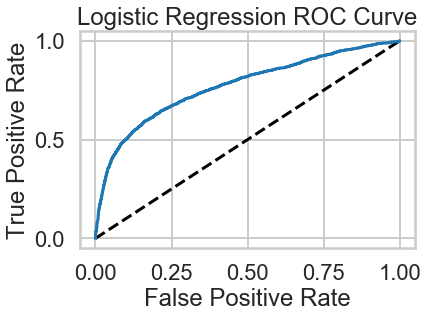

In [21]:
#### Paso 3: Instantiate the Estimator

from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(solver='liblinear', random_state=21))])


param_grid_lr = {
    
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}



lr_cv = GridSearchCV(lr, param_grid_lr, cv=5, iid=False)



t0 = time.time()
lr_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for Logistic Regression fitting")
metrics.loc['Time to Train', 'LR'] = ttt



y_pred = lr_cv.predict(X_test)


print("Accuracy with lr on testing set is: %.3f" % lr_cv.score(X_test, y_test))
# Latest accuracy is 0.82

metrics.loc['accuracy', 'LR'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'LR'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'LR'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = lr_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'LR'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

under de curve area

In [18]:
roc_auc_score(y_test, y_pred_prob)

0.7707402314553027

Entonces, al comparar nuestro modelo con el modelo dummy por precisión y f1-score además del simple recall, vemos que nuestro modelo tiene una mejora sustancial. La precisión ponderada aumenta en 0.2 y la puntuación f1 ponderada en 0.12.

###### Mejores Parametros

print("mean cross-validated score of the best_estimator: %.3f " % lr_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C = %.3f" % lr_cv.best_params_.get('classifier__C'))
print("Parameter setting that gave the best results on the hold out data: penalty =", lr_cv.best_params_.get('classifier__penalty'))

In [22]:
coefs = lr_cv.best_estimator_.named_steps['classifier'].coef_
print("Total Number of Features:", coefs.size)
print(" Number of Selected Features:", np.count_nonzero(coefs))

Total Number of Features: 74
 Number of Selected Features: 74


###### Ingeniería de características

Mirando registros con baja probabilidad de incumplimiento

In [23]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

if ('prob_of_default' in train_data):
    train_data = train_data.drop(columns=['prob_of_default'])
if ('prob_of_default' in test_data):
    test_data = test_data.drop(columns=['prob_of_default'])

probs_train = lr_cv.predict_proba(X_train)[:,1] # probs = probability of default
probs_test = lr_cv.predict_proba(X_test)[:,1] # probs = probability of default

train_data['prob_of_default'] = probs_train
test_data['prob_of_default'] = probs_test

train_data['train/test'] = 'train'
test_data['train/test'] = 'test'

new_data = train_data.append(test_data).sort_index()

In [24]:
train_ranked = new_data.loc[new_data['train/test'] == 'train'].sort_values(by='prob_of_default')
test_ranked = new_data.loc[new_data['train/test'] == 'test'].sort_values(by='prob_of_default')

We can see values with low probability of payment

In [25]:
train_ranked.loc[(train_ranked.prob_of_default < 0.5) & (train_ranked.default == 1)].head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prob_of_default,train/test
18967,480000.0,2,2,2,30.0,0,0,0,0,0,0,470400.0,0.0,0.0,0.0,0.0,330982.0,0.0,0.0,0.0,0.0,330982.0,30000.0,1,0.008714,train


Default value of 18967 has an default probability of 1% approv. This ssems to happened because of a high account balance in September, just before the they broke. One conclusion is to see all clinets with high invoices in September and to see how many are not paid yet

In [26]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0)].default.mean()

0.136935318275154

Is not the same case with PAY_1 = 0 and BILL_ATM1 > 0 default more than average. Actually its value is lower than average. What happens is we also have an account in PAT_ATM1?

In [27]:
train_ranked.loc[(train_ranked.PAY_1 == 0 ) & (train_ranked.BILL_AMT1 > 0) & (train_ranked.PAY_AMT1 == 0)].default.mean()

0.2199248120300752

It is higher but only over the median , we cannot create a rule based on this

In [28]:
train_ranked.corr()['prob_of_default'].sort_values(ascending=False)

prob_of_default    1.000000
PAY_1              0.863046
PAY_2              0.717357
PAY_3              0.620379
PAY_4              0.569172
PAY_5              0.553823
PAY_6              0.529635
default            0.448376
EDUCATION          0.072797
AGE                0.029596
BILL_AMT6         -0.012769
BILL_AMT5         -0.014157
BILL_AMT4         -0.023480
BILL_AMT3         -0.027610
BILL_AMT2         -0.027901
BILL_AMT1         -0.038691
MARRIAGE          -0.057787
SEX               -0.076343
PAY_AMT6          -0.111689
PAY_AMT4          -0.120847
PAY_AMT5          -0.123324
PAY_AMT2          -0.123772
PAY_AMT3          -0.141115
PAY_AMT1          -0.170352
LIMIT_BAL         -0.327867
Name: prob_of_default, dtype: float64

The non-payment probability is highly related with rembursement state, and the correlation force increases with time.

Model 2: KNN

It takes 174.053  seconds for KNN fitting
Accuracy with KNN on the test set is: 0.821
PREDICTION   pay  default  Total
TRUE                            
pay         6695      314   7009
default     1297      694   1991
Total       7992     1008   9000
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.69      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



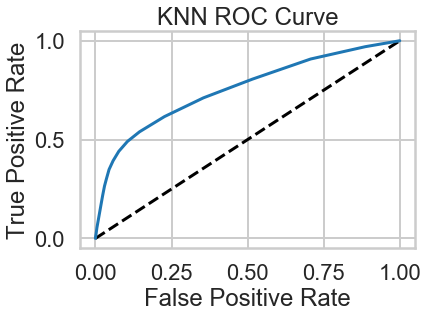

In [29]:
from sklearn.neighbors import KNeighborsClassifier

#3
knn = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])
#4
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}

#5
knn_cv = RandomizedSearchCV(knn, param_grid_knn, cv=3, iid=False)

#6
t0 = time.time()
knn_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for KNN fitting")
metrics.loc['Time to Train', 'KNN'] = ttt

#7
y_pred = knn_cv.predict(X_test)

#8
print("Accuracy with KNN on the test set is: %.3f" % knn_cv.score(X_test, y_test))
# latest accuracy is 0.81

metrics.loc['accuracy', 'KNN'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'KNN'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'KNN'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'KNN'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

Better Parameters

In [2]:
print("mean cross-validated score of the best_estimator: %.3f " % knn_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_neighbors =", knn_cv.best_params_.get('classifier__n_neighbors'))

NameError: name 'knn_cv' is not defined

#### Model 3: Support Vector Machine

In [31]:
from sklearn.svm import SVC
#3
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC())])
#4
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

#5
svm_cv = RandomizedSearchCV(svm, param_grid_svm, cv=3, iid=False)

#6
t0 = time.time()
svm_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for SVM fitting")
metrics.loc['Time to Train', 'SVM'] = ttt

#7
y_pred = svm_cv.predict(X_test)

#8
print("Accuracy with SVM on the test set is: %.3f" % svm_cv.score(X_test, y_test))

metrics.loc['accuracy', 'SVM'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'SVM'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'SVM'] = recall_score(y_pred=y_pred, y_true=y_test)

# SVC class doesn't have a predict_proba method
# y_pred_prob = svm_cv.predict_proba(X_test)[:,1]
# metrics.loc['AUC', 'SVM'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# No ROC Curve because no predict_proba method
# ROC Curve
# fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
# plt.plot([0,1], [0,1], 'k--')
# plt.plot(fpr, tpr, label='SVM')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC Curve')
# plt.show()

It takes 968.909  seconds for SVM fitting
Accuracy with SVM on the test set is: 0.826
PREDICTION   pay  default  Total
TRUE                            
pay         6702      307   7009
default     1261      730   1991
Total       7963     1037   9000
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7009
           1       0.70      0.37      0.48      1991

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.83      0.80      9000



Better parameters

In [32]:
print("mean cross-validated score of the best_estimator: %.3f " % svm_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C =", svm_cv.best_params_.get('classifier__C'))
print("Parameter setting that gave the best results on the hold out data: gamma =", svm_cv.best_params_.get('classifier__gamma'))

mean cross-validated score of the best_estimator: 0.818 
Parameter setting that gave the best results on the hold out data: C = 1
Parameter setting that gave the best results on the hold out data: gamma = 0.1


#### Model 4: Decision Tree

It takes 14.403  seconds for dt fitting
Accuracy with dt on the test set is: 0.817
PREDICTION   pay  default  Total
TRUE                            
pay         6664      345   7009
default     1299      692   1991
Total       7963     1037   9000
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



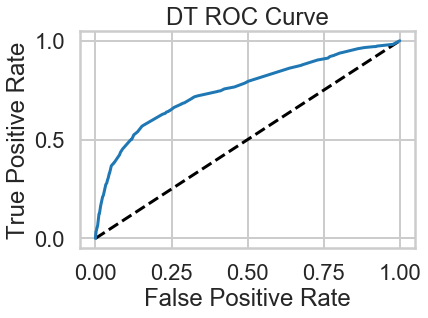

In [33]:
from sklearn.tree import DecisionTreeClassifier

#3
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier(random_state=21))])
#4

param_grid_dt = {'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]}

#5
dt_cv = RandomizedSearchCV(dt, param_grid_dt, cv=10, iid=False)

#6
t0 = time.time()
dt_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for dt fitting")
metrics.loc['Time to Train', 'DT'] = ttt

#7
y_pred = dt_cv.predict(X_test)

#8
print("Accuracy with dt on the test set is: %.3f" % dt_cv.score(X_test, y_test))

metrics.loc['accuracy', 'DT'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'DT'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'DT'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = dt_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'DT'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
plt.show()

##### Mejores parametros

In [34]:
print("mean cross-validated score of the best_estimator: %.3f " % dt_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: max_depth =", dt_cv.best_params_.get('classifier__max_depth'))
print("Parameter setting that gave the best results on the hold out data: max_features =", dt_cv.best_params_.get('classifier__max_features'))
print("Parameter setting that gave the best results on the hold out data: min_samples_leaf =", dt_cv.best_params_.get('classifier__min_samples_leaf'))
print("Parameter setting that gave the best results on the hold out data: min_samples_split =", dt_cv.best_params_.get('classifier__min_samples_split'))
print("Parameter setting that gave the best results on the hold out data: criterion =", dt_cv.best_params_.get('classifier__criterion'))

mean cross-validated score of the best_estimator: 0.805 
Parameter setting that gave the best results on the hold out data: max_depth = 10
Parameter setting that gave the best results on the hold out data: max_features = 8
Parameter setting that gave the best results on the hold out data: min_samples_leaf = 8
Parameter setting that gave the best results on the hold out data: min_samples_split = 3
Parameter setting that gave the best results on the hold out data: criterion = entropy


Model 5: RandomForest

In [33]:
#%run import_data.py

In [36]:
#%run -i std_preprocessing_and_splitting.py

It takes 189.350  seconds for rf fitting
Accuracy with RF on the test set is: 0.825
PREDICTION   pay  default  Total
TRUE                            
pay         6682      327   7009
default     1249      742   1991
Total       7931     1069   9000
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.69      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



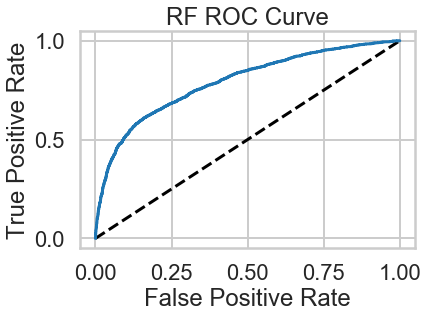

In [35]:
from sklearn.ensemble import RandomForestClassifier

#3
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])
#4
#Configure los parámetros y distribuciones para muestrear: param_dist
param_grid_rf = {'classifier__n_estimators': [50, 100],
                'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
                }

#5
rf_cv = RandomizedSearchCV(rf, param_grid_rf, cv=10, iid=False)

#6
t0 = time.time()
rf_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for rf fitting")
metrics.loc['Time to Train', 'RF'] = ttt

#7
y_pred = rf_cv.predict(X_test)

#8
print("Accuracy with RF on the test set is: %.3f" % rf_cv.score(X_test, y_test))

metrics.loc['accuracy', 'RF'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'RF'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'RF'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = rf_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'RF'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve')
plt.show()

##### Mejores Parametros

In [36]:
print("mean cross-validated score of the best_estimator: %.3f " % rf_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_estimators =", rf_cv.best_params_.get('classifier__n_estimators'))
print("Parameter setting that gave the best results on the hold out data: max_depth =", rf_cv.best_params_.get('classifier__max_depth'))
print("Parameter setting that gave the best results on the hold out data: max_features =", rf_cv.best_params_.get('classifier__max_features'))
print("Parameter setting that gave the best results on the hold out data: min_samples_leaf =", rf_cv.best_params_.get('classifier__min_samples_leaf'))
print("Parameter setting that gave the best results on the hold out data: min_samples_split =", rf_cv.best_params_.get('classifier__min_samples_split'))
print("Parameter setting that gave the best results on the hold out data: criterion =", rf_cv.best_params_.get('classifier__criterion'))

mean cross-validated score of the best_estimator: 0.817 
Parameter setting that gave the best results on the hold out data: n_estimators = 100
Parameter setting that gave the best results on the hold out data: max_depth = None
Parameter setting that gave the best results on the hold out data: max_features = 8
Parameter setting that gave the best results on the hold out data: min_samples_leaf = 5
Parameter setting that gave the best results on the hold out data: min_samples_split = 5
Parameter setting that gave the best results on the hold out data: criterion = gini


#### Model 6: Naive Bayes

It takes 0.119  seconds for nb fitting
Accuracy with nb on the test set is: 0.806
PREDICTION   pay  default  Total
TRUE                            
pay         6798      211   7009
default     1537      454   1991
Total       8335      665   9000
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.68      0.23      0.34      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



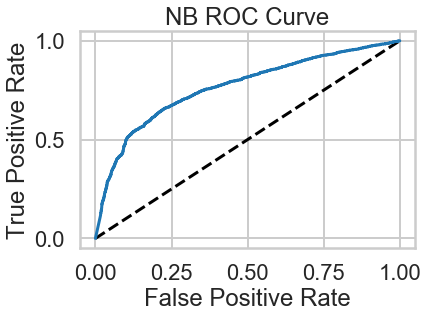

In [37]:
from sklearn.naive_bayes import GaussianNB

#3
nb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', GaussianNB())])

#6
t0 = time.time()
nb.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for nb fitting")
metrics.loc['Time to Train', 'NB'] = ttt

#7
y_pred = nb.predict(X_test)

#8
print("Accuracy with nb on the test set is: %.3f" % nb.score(X_test, y_test))

metrics.loc['accuracy', 'NB'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'NB'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'NB'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = nb.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'NB'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB ROC Curve')
plt.show()

Comparing Models

In [38]:
from pandas.plotting import table

In [39]:
metrics.astype(float).round(3)

,Dummy Model,LR,KNN,SVM,DT,RF,NB
accuracy,0.779,0.824,0.821,0.826,0.817,0.825,0.806
precision,0.000,0.694,0.688,0.704,0.667,0.694,0.683
recall,0.000,0.368,0.349,0.367,0.348,0.373,0.228
AUC,0.500,0.771,0.754,NaN,0.753,0.791,0.765
Time to Train,0.116,122.608,174.053,968.909,14.403,189.350,0.119


In [40]:
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100

In [41]:
times = metrics.astype(float).round(3).loc[['Time to Train']]

All the models had a similar Accuracy and allof the are better than the dummy model. However the SVM es the best

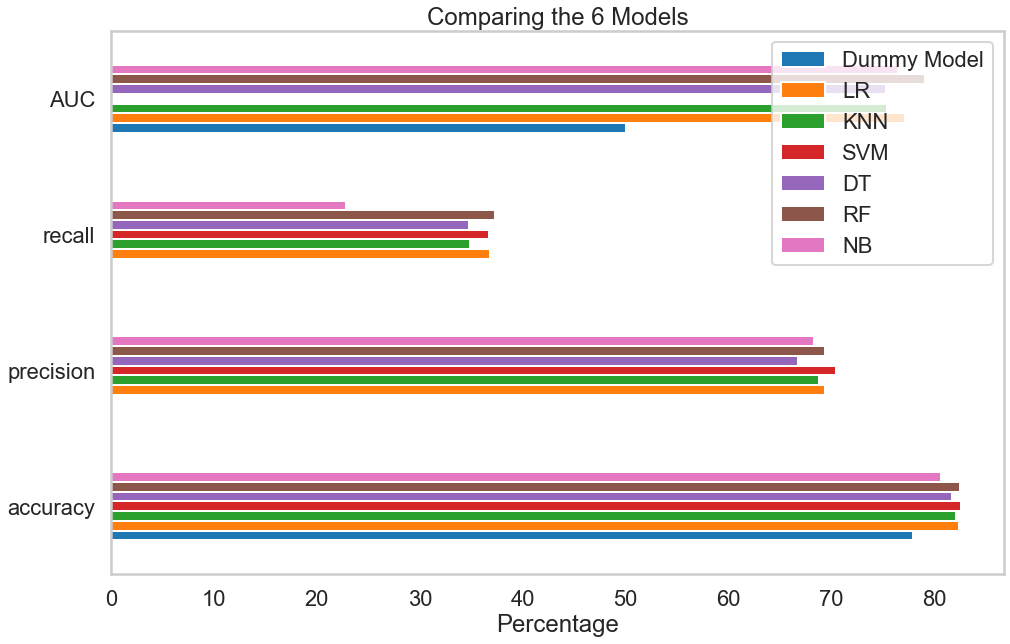

In [42]:
fig, ax = plt.subplots(figsize=(16,10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_title('Comparing the 6 Models')
ax.grid();
fig.savefig('comparisons')

In [43]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=lr_cv.predict_proba(X_test)[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=knn_cv.predict_proba(X_test)[:,1])
#precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=y_test, probas_pred=svm.predict_proba(X_test)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=dt_cv.predict_proba(X_test)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=rf_cv.predict_proba(X_test)[:,1])
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=nb.predict_proba(X_test)[:,1])


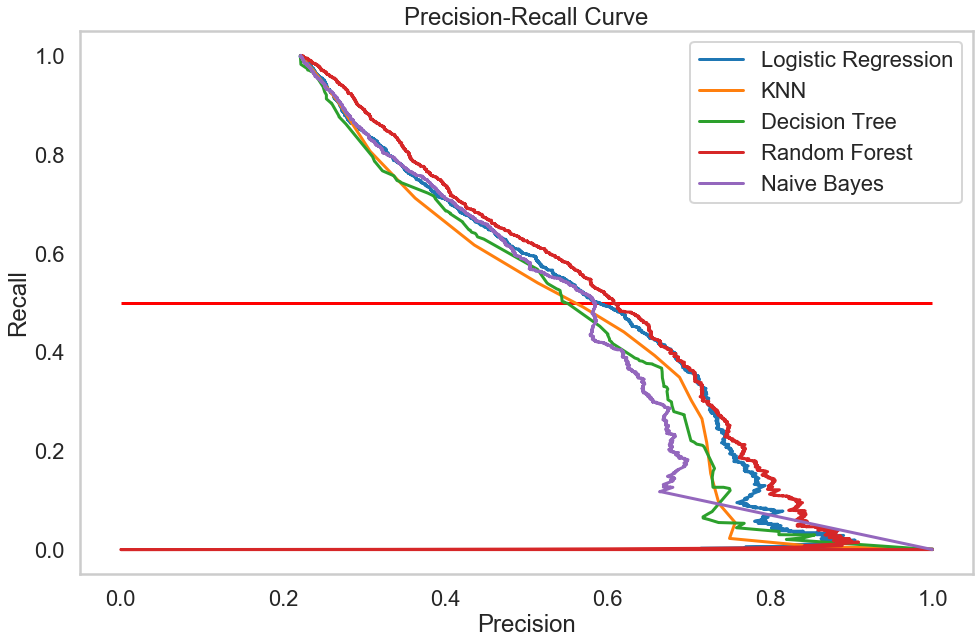

In [44]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(precision_lr, recall_lr, label='Logistic Regression')
ax.plot(precision_knn, recall_knn, label='KNN')
ax.plot(precision_dt, recall_dt, label='Decision Tree')
ax.plot(precision_rf, recall_rf, label='Random Forest')
ax.plot(precision_nb, recall_nb, label='Naive Bayes')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
fig.savefig('pr_curves')

Confusion Matrox fro RF

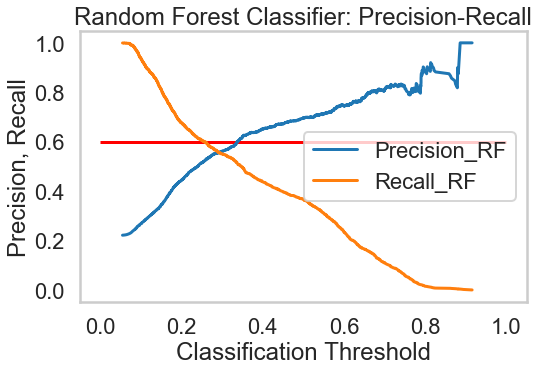

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_rf, precision_rf[1:], label='Precision_RF')
ax.plot(thresholds_rf, recall_rf[1:], label='Recall_RF')
#ax.plot(thresholds_lr, precision_lr[1:], label='Precision_LR')
#ax.plot(thresholds_lr, recall_lr[1:], label='Recall_LR')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Random Forest Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();
fig.savefig('random_forest_pr_curve')

In [45]:
y_pred_proba = rf_cv.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.25).astype(int)
# Confusion Matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
print("Accuracy: ", 100*accuracy_score(y_pred=y_pred_test, y_true=y_test))

Conf_Matrix(CM)

Recall:  62.88297338021095
Precision:  49.46661398656658
Accuracy:  77.57777777777778


PREDICTION,pay,default,Total
TRUE,,,
pay,5730,1279,7009
default,739,1252,1991
Total,6469,2531,9000
